# Calculating Entangling Power for Parameterized Quantum Circuits (PQCs)

In this tutorial, we will learn how to calcualte expressibility of Parameterized Quantum Circuits (PQCs) using qLEET, which could thought of as traversing power of a PQC in the Hilbert space. We look at different parameterized states generated by the sampled ensemble of parameters for a given PQC. We then compare the resulting distribution of state fidelities generated by this sampled ensemble to that of the ensemble of Haar random states.

We currently support two expressibility measures - **Kullback–Leibler Divergence** and **Jensen–Shannon Divergence**
$$ Expr = D_{KL}(\hat{P}_{PQC}(F; \theta) | P_{Haar}(F)) $$
$$ Expr = D_{\sqrt{JSD}}(\hat{P}_{PQC}(F; \theta) | P_{Haar}(F)) $$

In [1]:
import sys
sys.path.append('..')

In [2]:
# necessary imports 
import numpy as np
import qiskit
import qleet

2022-11-19 20:00:12.196964: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-11-19 20:00:12.726634: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-19 20:00:12.727057: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-19 20:00:12.775726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 20:00:12.775927: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.702GHz coreCount: 30 deviceMemorySize: 5.81GiB deviceMemoryBandwidth: 312.97GiB/s
2022-11-19 20:00:12.775978: I tensorflow/stream_executor/

## Circuit 1 - Identity

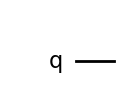

In [3]:
qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.draw("mpl")

In [4]:
params = []
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)

In [5]:
qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(
    qiskit_descriptor, samples=100
)

In [6]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.9795566834531355

In [7]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

4.6051700036233525

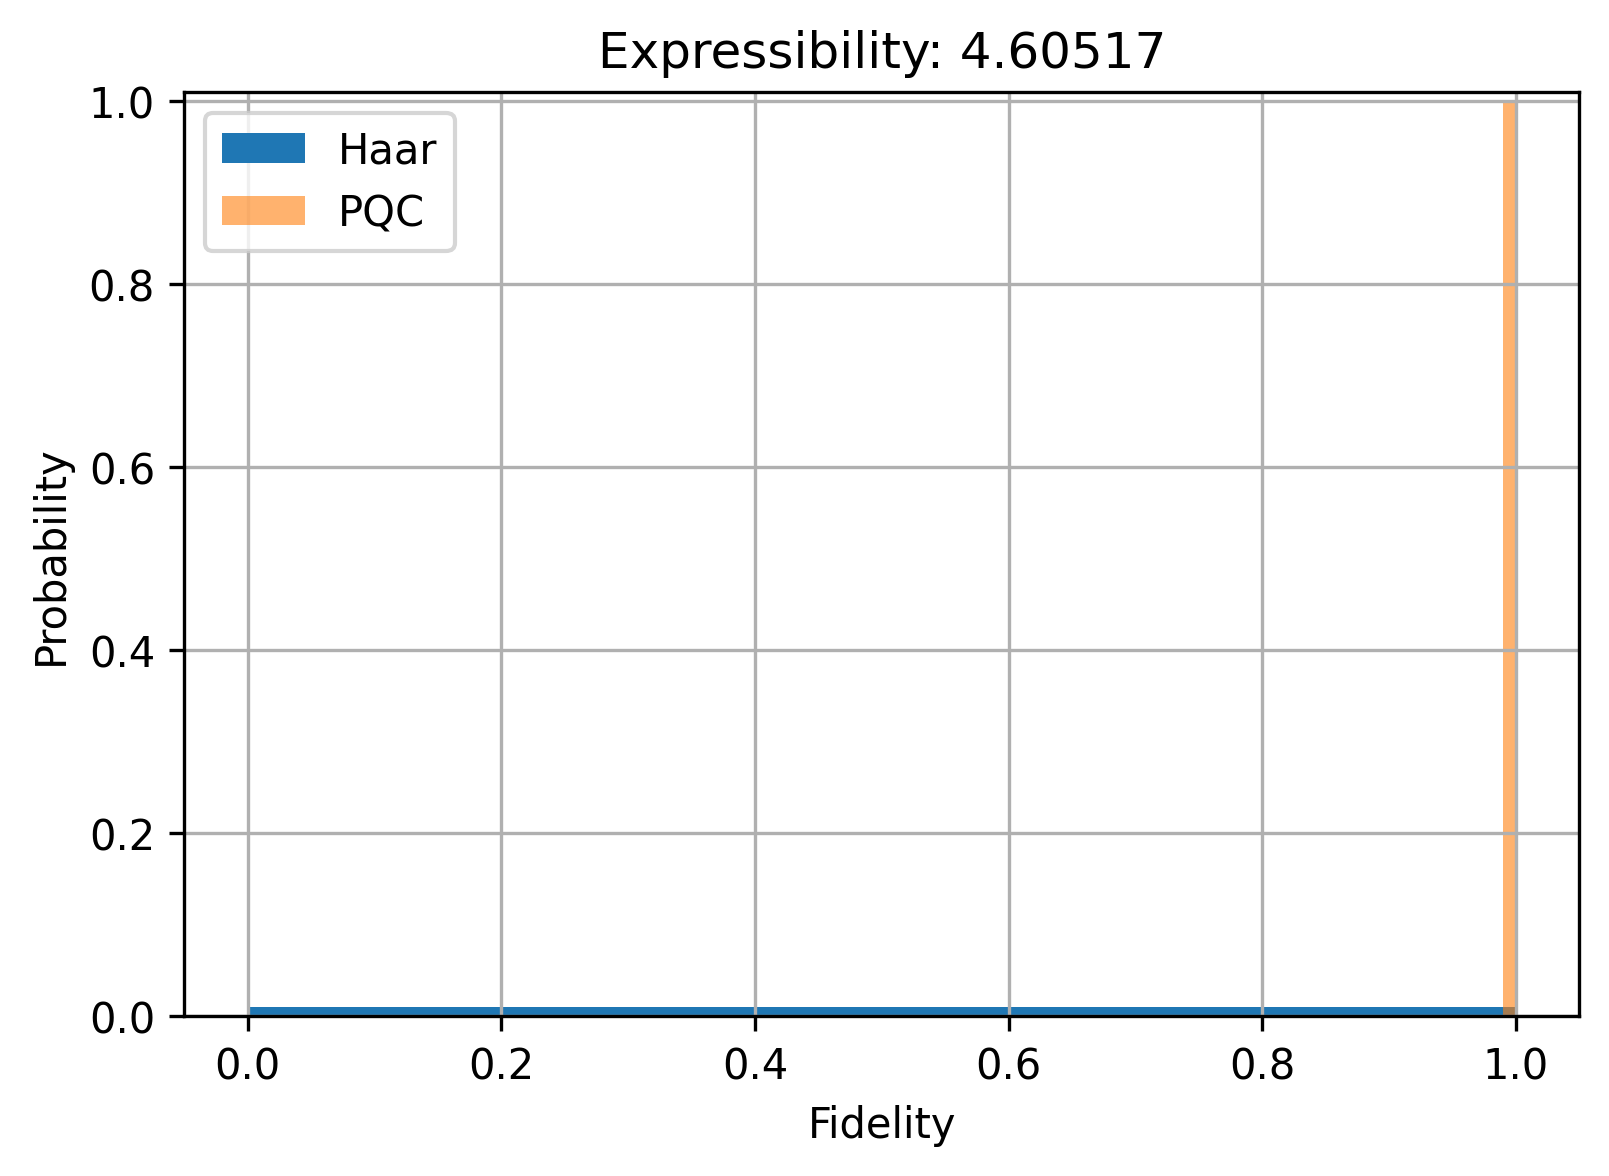

In [8]:
plt_figure = qiskit_expressibility.plot()

## Circuit 2 - H Rz

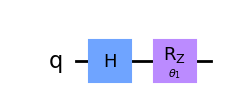

In [9]:
params = [qiskit.circuit.Parameter(r"$θ_1$")]

qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.h(0)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.draw("mpl")

In [10]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)
qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(
    qiskit_descriptor, samples=100
)

In [11]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.24093807286300242

In [12]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

0.22105508262642595

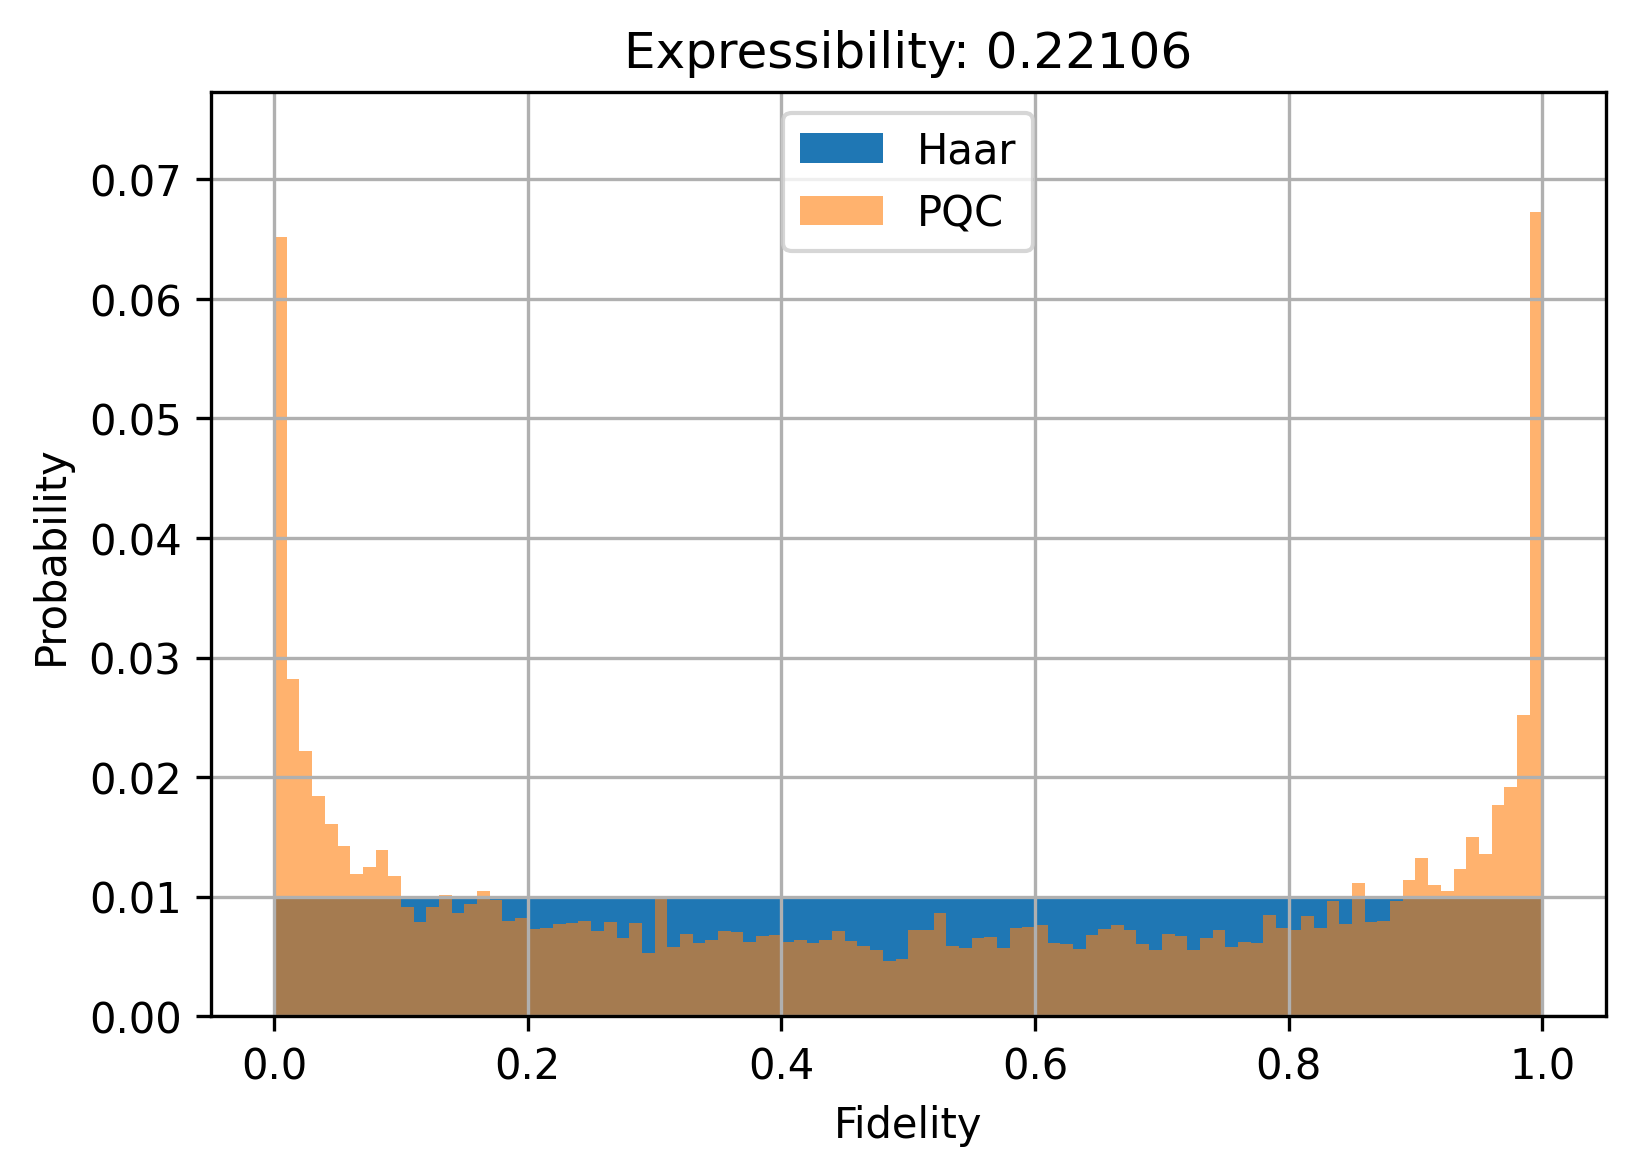

In [13]:
plt_figure = qiskit_expressibility.plot()

## Circuit 3 - H Rx Rz

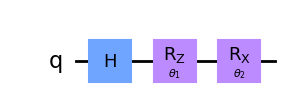

In [14]:
params = [qiskit.circuit.Parameter(r"$θ_1$"), 
          qiskit.circuit.Parameter(r"$θ_2$")]

qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.h(0)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.rx(params[1], 0)
qiskit_circuit.draw("mpl")

In [15]:
qiskit_descriptor = qleet.interface.circuit.CircuitDescriptor(
    circuit=qiskit_circuit, params=params, cost_function=None
)
qiskit_expressibility = qleet.analyzers.expressibility.Expressibility(
    qiskit_descriptor, samples=100
)

In [16]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.0815718866250049

In [17]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

0.011683280169520457

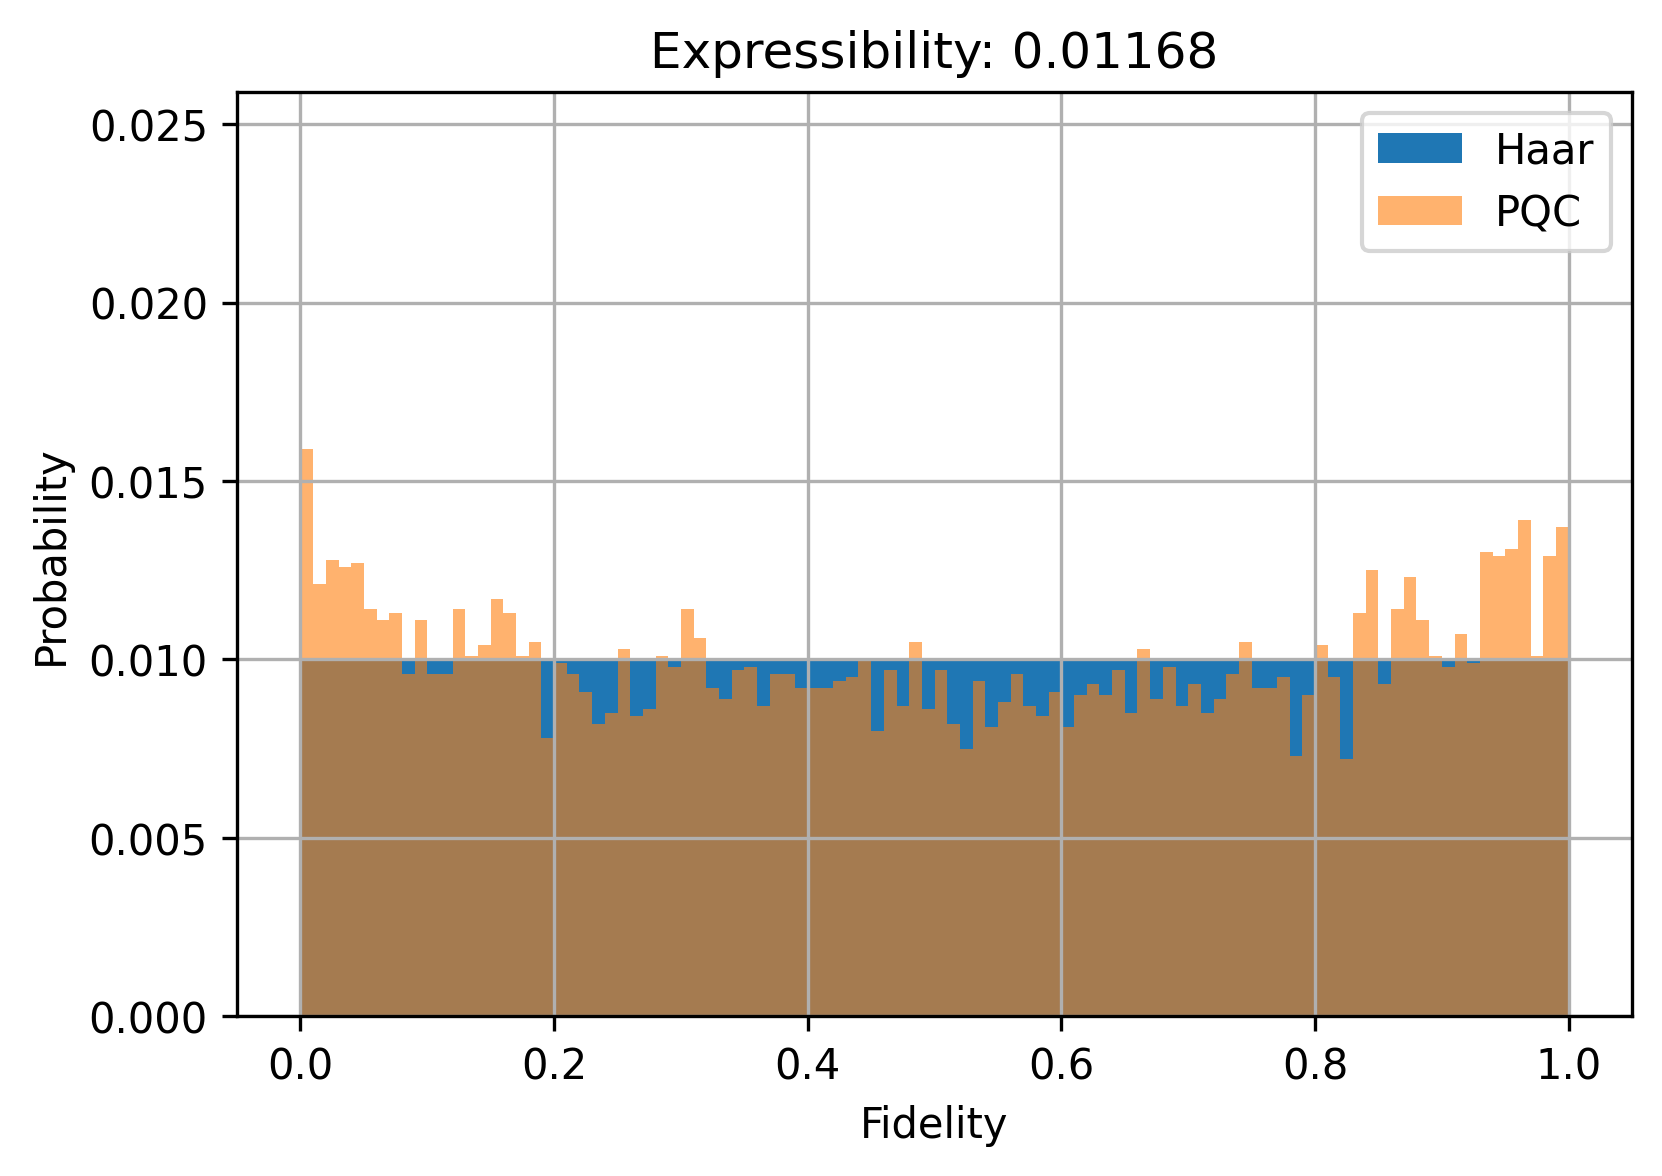

In [18]:
plt_figure = qiskit_expressibility.plot()

## Circuit 4 - Unitary U

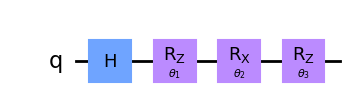

In [19]:
params = [qiskit.circuit.Parameter(r"$θ_1$"), 
          qiskit.circuit.Parameter(r"$θ_2$"), 
          qiskit.circuit.Parameter(r"$θ_3$")]

qiskit_circuit = qiskit.QuantumCircuit(1)
qiskit_circuit.h(0)
qiskit_circuit.rz(params[0], 0)
qiskit_circuit.rx(params[1], 0)
qiskit_circuit.rz(params[2], 0)
qiskit_circuit.draw("mpl")

In [20]:
expr_jsd = qiskit_expressibility.expressibility("jsd")
expr_jsd

0.06969535963967462

In [21]:
expr_kld = qiskit_expressibility.expressibility("kld")
expr_kld

0.015166652375894197

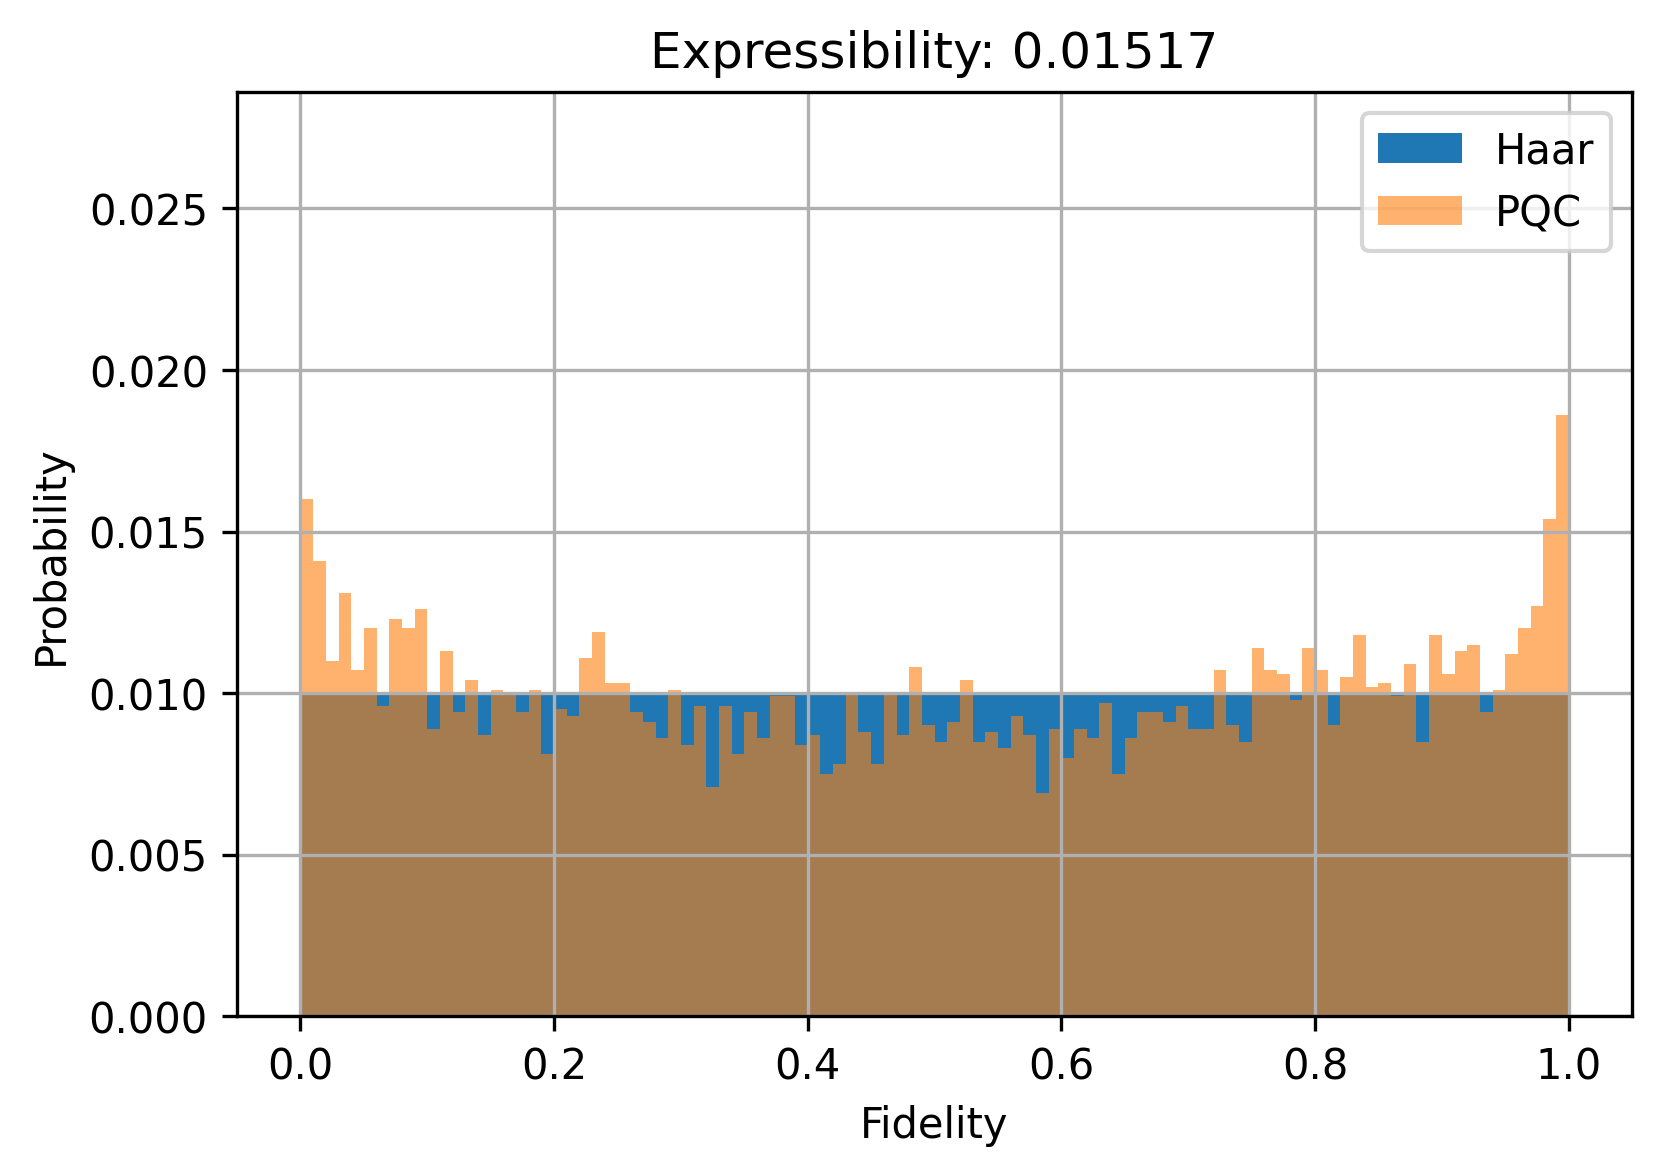

In [22]:
plt_figure = qiskit_expressibility.plot()